Following the workshop on 19/11/2020 this script aims to apply the EDA in long-term-workflow.ipynb to multiple sites with particular emphasis on comparing this analysis across sites

update 02/12/2020
1. Standardised deseasonalised data has been added. The motivation here is that the COUNTS data has differeing variance for each season and the high variance in the summer months made it hard to determine the behaviour of the de-seasonalied data over the winter months. 
 - Seasonal sub-series plot added
 - Multi-frequency changepoints (very interesting!)
 - Multi-frequency and univariate changepoints
 
1. Moving average segmentations updated
 - Multi-frequency changepoint
 - Multi-frequency and univariate changepoints

In [1]:
setwd("/data/notebooks/jupyterlab-workshop")
source("R/helper.R")
#source("cpt/source.R")
options(repr.plot.width = 27, repr.plot.height = 15)
#options(repr.plot.width = 13, repr.plot.height = 7)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Parsed with column specification:
cols(
  IM_SPEC = col_double(),
  DESC_LATIN = col_character(),
  DESC_COMMON = col_character(),
  IM_GROUP = col_character()
)

Parsed with column specification:
cols(
  IM_SPEC = col_character(),
  DESC_LATIN = col_character(),
  DESC_COMMON = col_character(),
  IM_GROUP = col_character()
)



Get the data for the analysis

In [2]:
data <- multi_site_analysis(sites = c("T08", "T09"),#, "T06"),
                            dataset = "moth", 
                            daterange = c("1950-01-01","2021-01-01"),
                            avg_missing_data = TRUE, 
                            plotPredOpt = NA)
nsites <- length(unique(data$site))

[1] "site:" "T08"  


Joining, by = "DATE"

The number of unsampled days during the selected date range at this site is: 2424.

The top 10 unsampled periods during the selected date range at this site is: 

# A tibble: 10 x 4
# Groups:   seq_id [10]
   seq_id STARTDATE  ENDDATE    duration
    <dbl> <date>     <date>        <int>
 1    600 2014-12-03 2015-03-12      100
 2     79 2000-01-02 2000-03-09       68
 3    467 2011-12-22 2012-02-23       64
 4    171 2004-12-17 2005-02-17       63
 5    510 2012-12-18 2013-02-14       59
 6    205 2006-01-05 2006-02-26       53
 7    551 2013-12-24 2014-02-06       45
 8    202 2005-11-16 2005-12-20       35
 9    135 2004-01-08 2004-02-10       34
10    246 2007-01-19 2007-02-18       31

# A tibble: 18,201 x 35
# Groups:   DATE [6,027]
   SITECODE LCODE FIELDNAME VALUE station DATE       FLAGID DESC_LATIN
   <fct>    <int> <chr>     <int> <chr>   <date>      <int> <chr>     
 1 T08          1 XX            0 T08-1   1992-10-22     NA No moths …
 2 T08          1

[1] "check_alldates: assuming dates are recorded same day each month"
[1] "missing dates:" "TRUE"          


Joining, by = "DATETIME"

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "month"

`summarise()` regrouping output by 'month' (override with `.groups` argument)

Joining, by = c("month", "site")



[1] "site:" "T09"  


Joining, by = "DATE"

The number of unsampled days during the selected date range at this site is: 1806.

The top 10 unsampled periods during the selected date range at this site is: 

# A tibble: 10 x 4
# Groups:   seq_id [10]
   seq_id STARTDATE  ENDDATE    duration
    <dbl> <date>     <date>        <int>
 1    518 2014-12-17 2015-01-27       42
 2    216 2006-12-26 2007-01-30       36
 3    437 2012-12-05 2013-01-09       36
 4    254 2007-12-29 2008-01-26       29
 5     40 2000-01-03 2000-01-27       25
 6    295 2009-01-24 2009-02-15       23
 7    480 2014-01-01 2014-01-22       22
 8     98 2004-01-01 2004-01-21       21
 9    367 2010-12-16 2011-01-05       21
10    438 2013-01-11 2013-01-31       21

# A tibble: 30,087 x 35
# Groups:   DATE [6,575]
   SITECODE LCODE FIELDNAME VALUE station DATE       FLAGID DESC_LATIN
   <fct>    <int> <chr>     <int> <chr>   <date>      <int> <chr>     
 1 T09          1 XX            0 T09-1   1993-01-02     NA No moths …
 2 T09          1

[1] "check_alldates: assuming dates are recorded same day each month"
[1] "missing dates:" "TRUE"          


Joining, by = "DATETIME"

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "month"

`summarise()` regrouping output by 'month' (override with `.groups` argument)

Joining, by = c("month", "site")

Joining, by = c("DATETIME", "counts", "n_species", "seq_id", "next_meas", "duration", "ENDDATE", "yearmonth", "month", "ma2x12", "detrend_ma2x12", "decomp_seas_comp", "std_decomp_seas", "decomp_deseason", "site", "decomp_deseason_sd", "decomp_deseason_std")



# Plot the counts

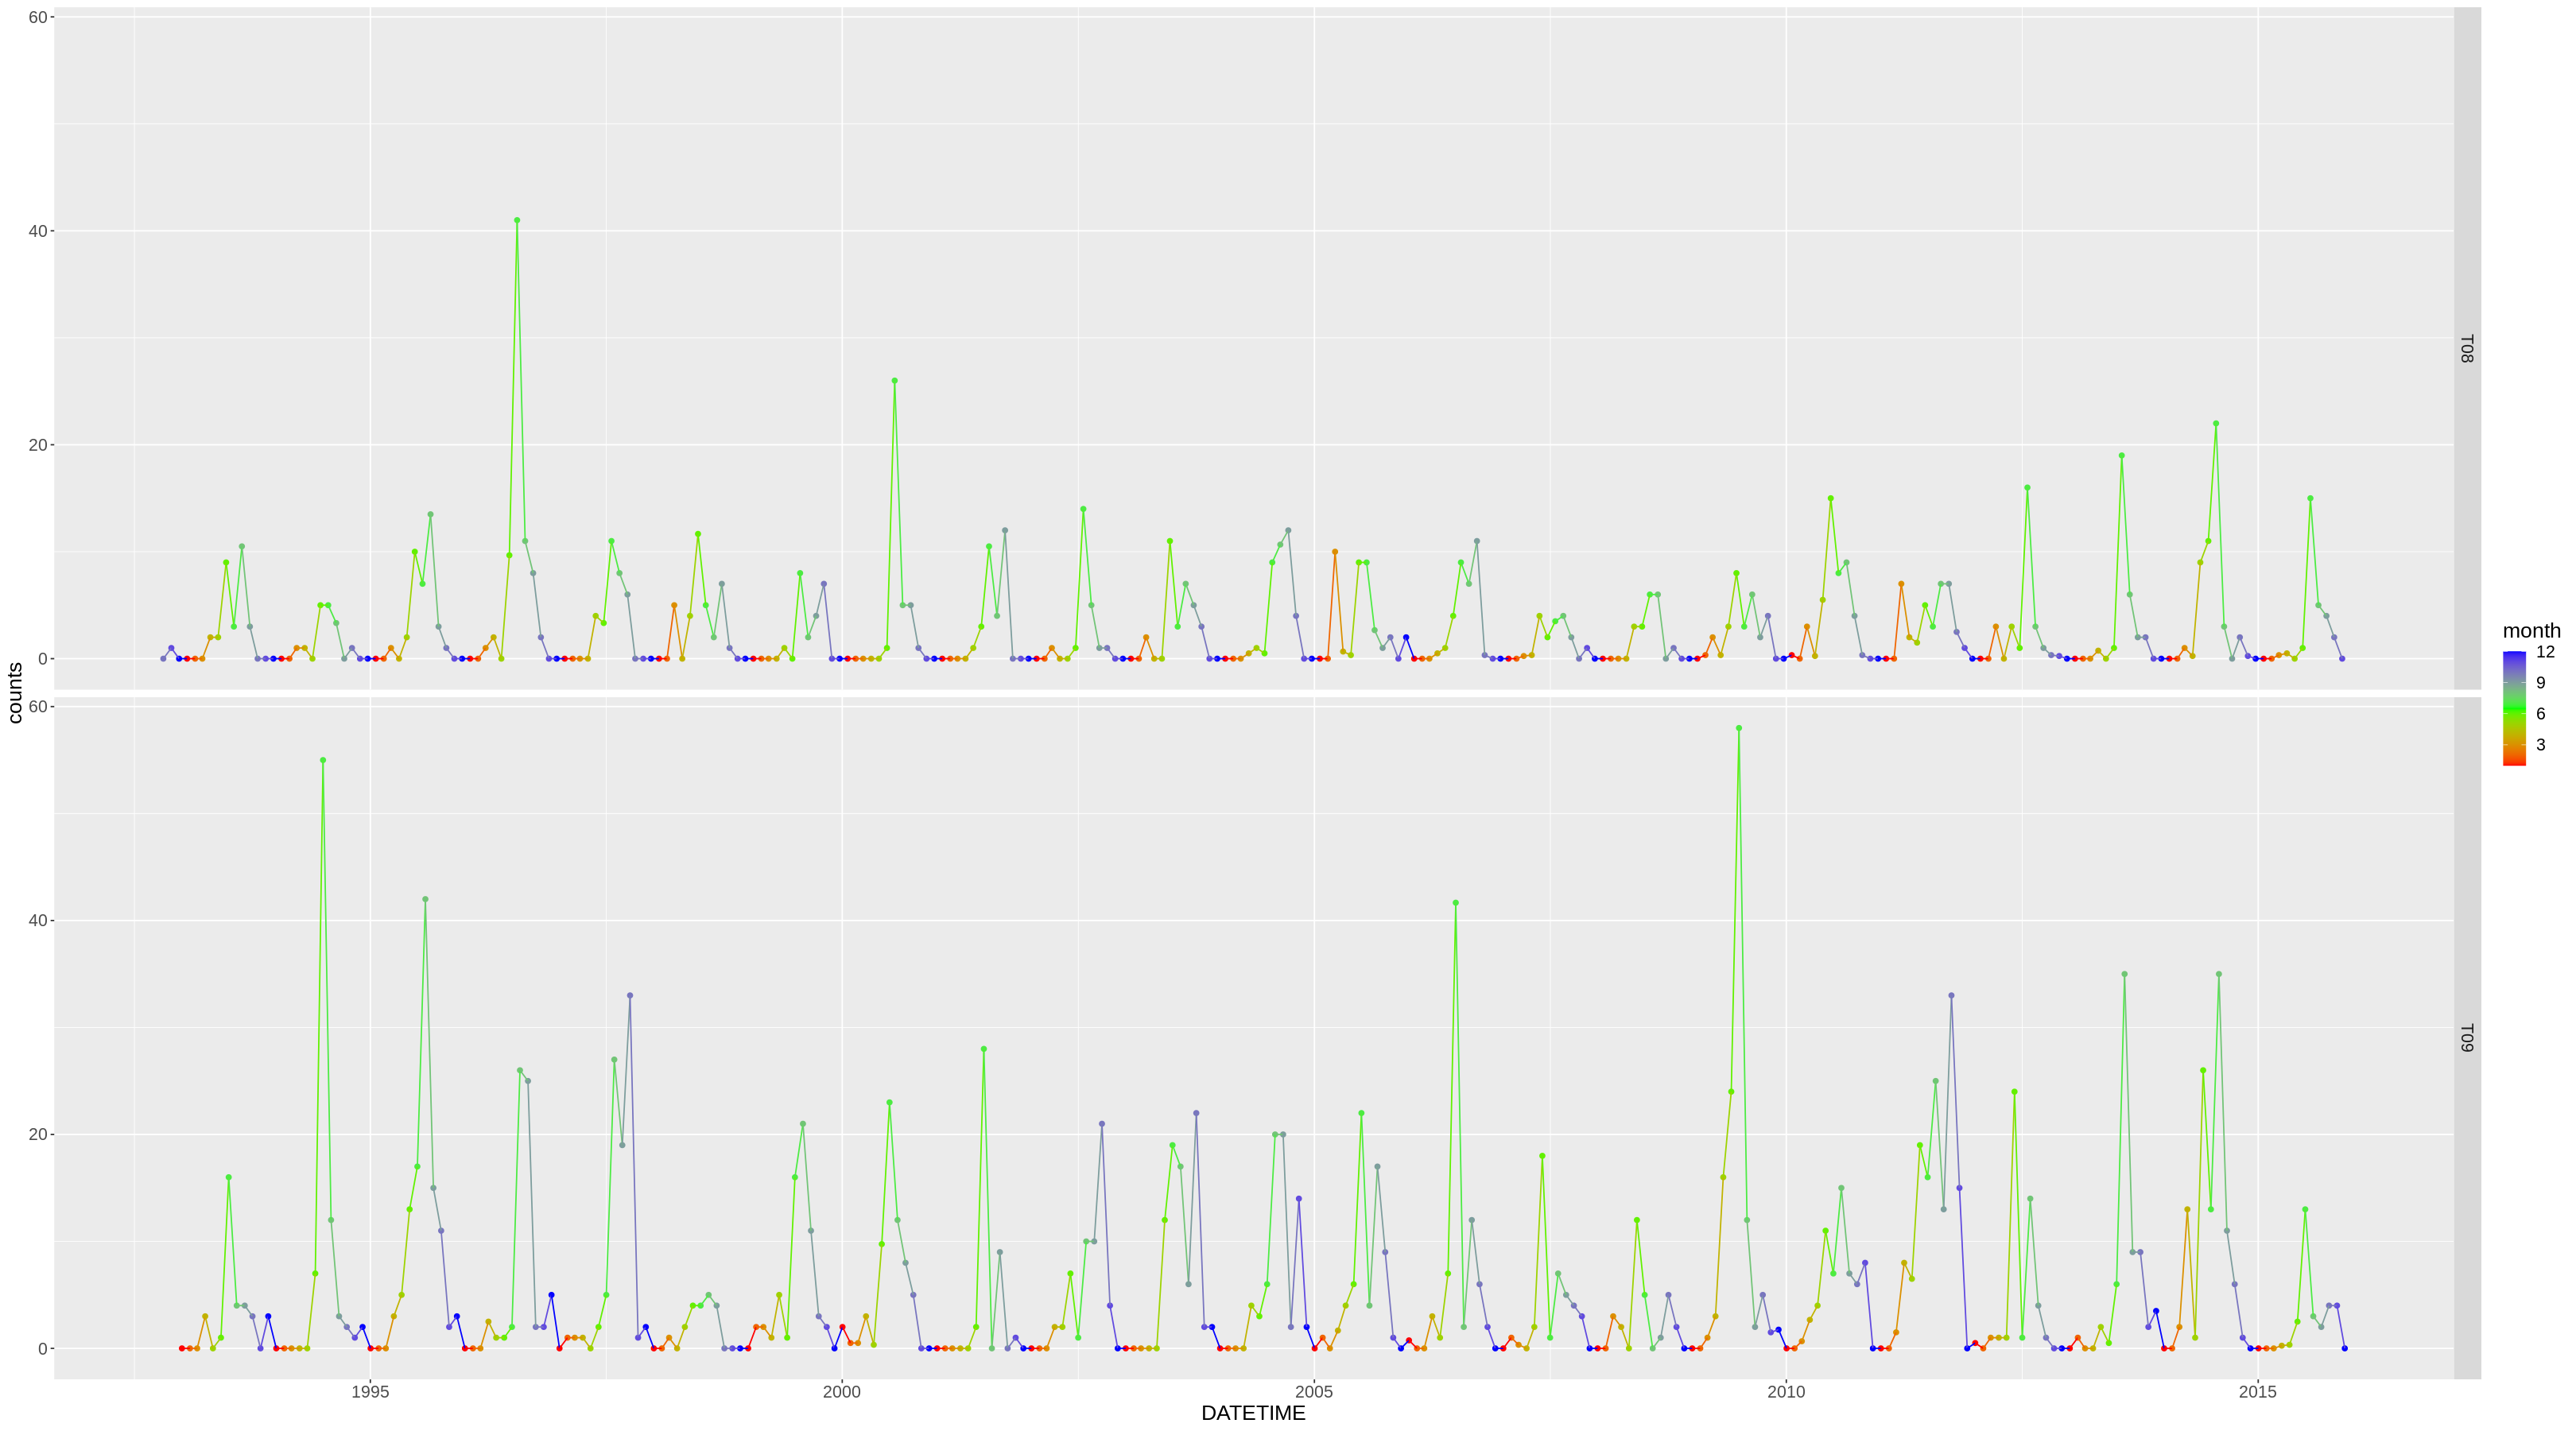

In [3]:
data %>% ggplot2::ggplot(aes(x = DATETIME, y = counts, color=month) ) +
    geom_point() +
    geom_line() +
    scale_color_gradientn(colours = rainbow(3)) +
    ggplot2::facet_grid(site ~ .) + 
    theme(text = element_text(size = 16))

# Seasonal sub-series plot
Plot the counts by month over the daterange

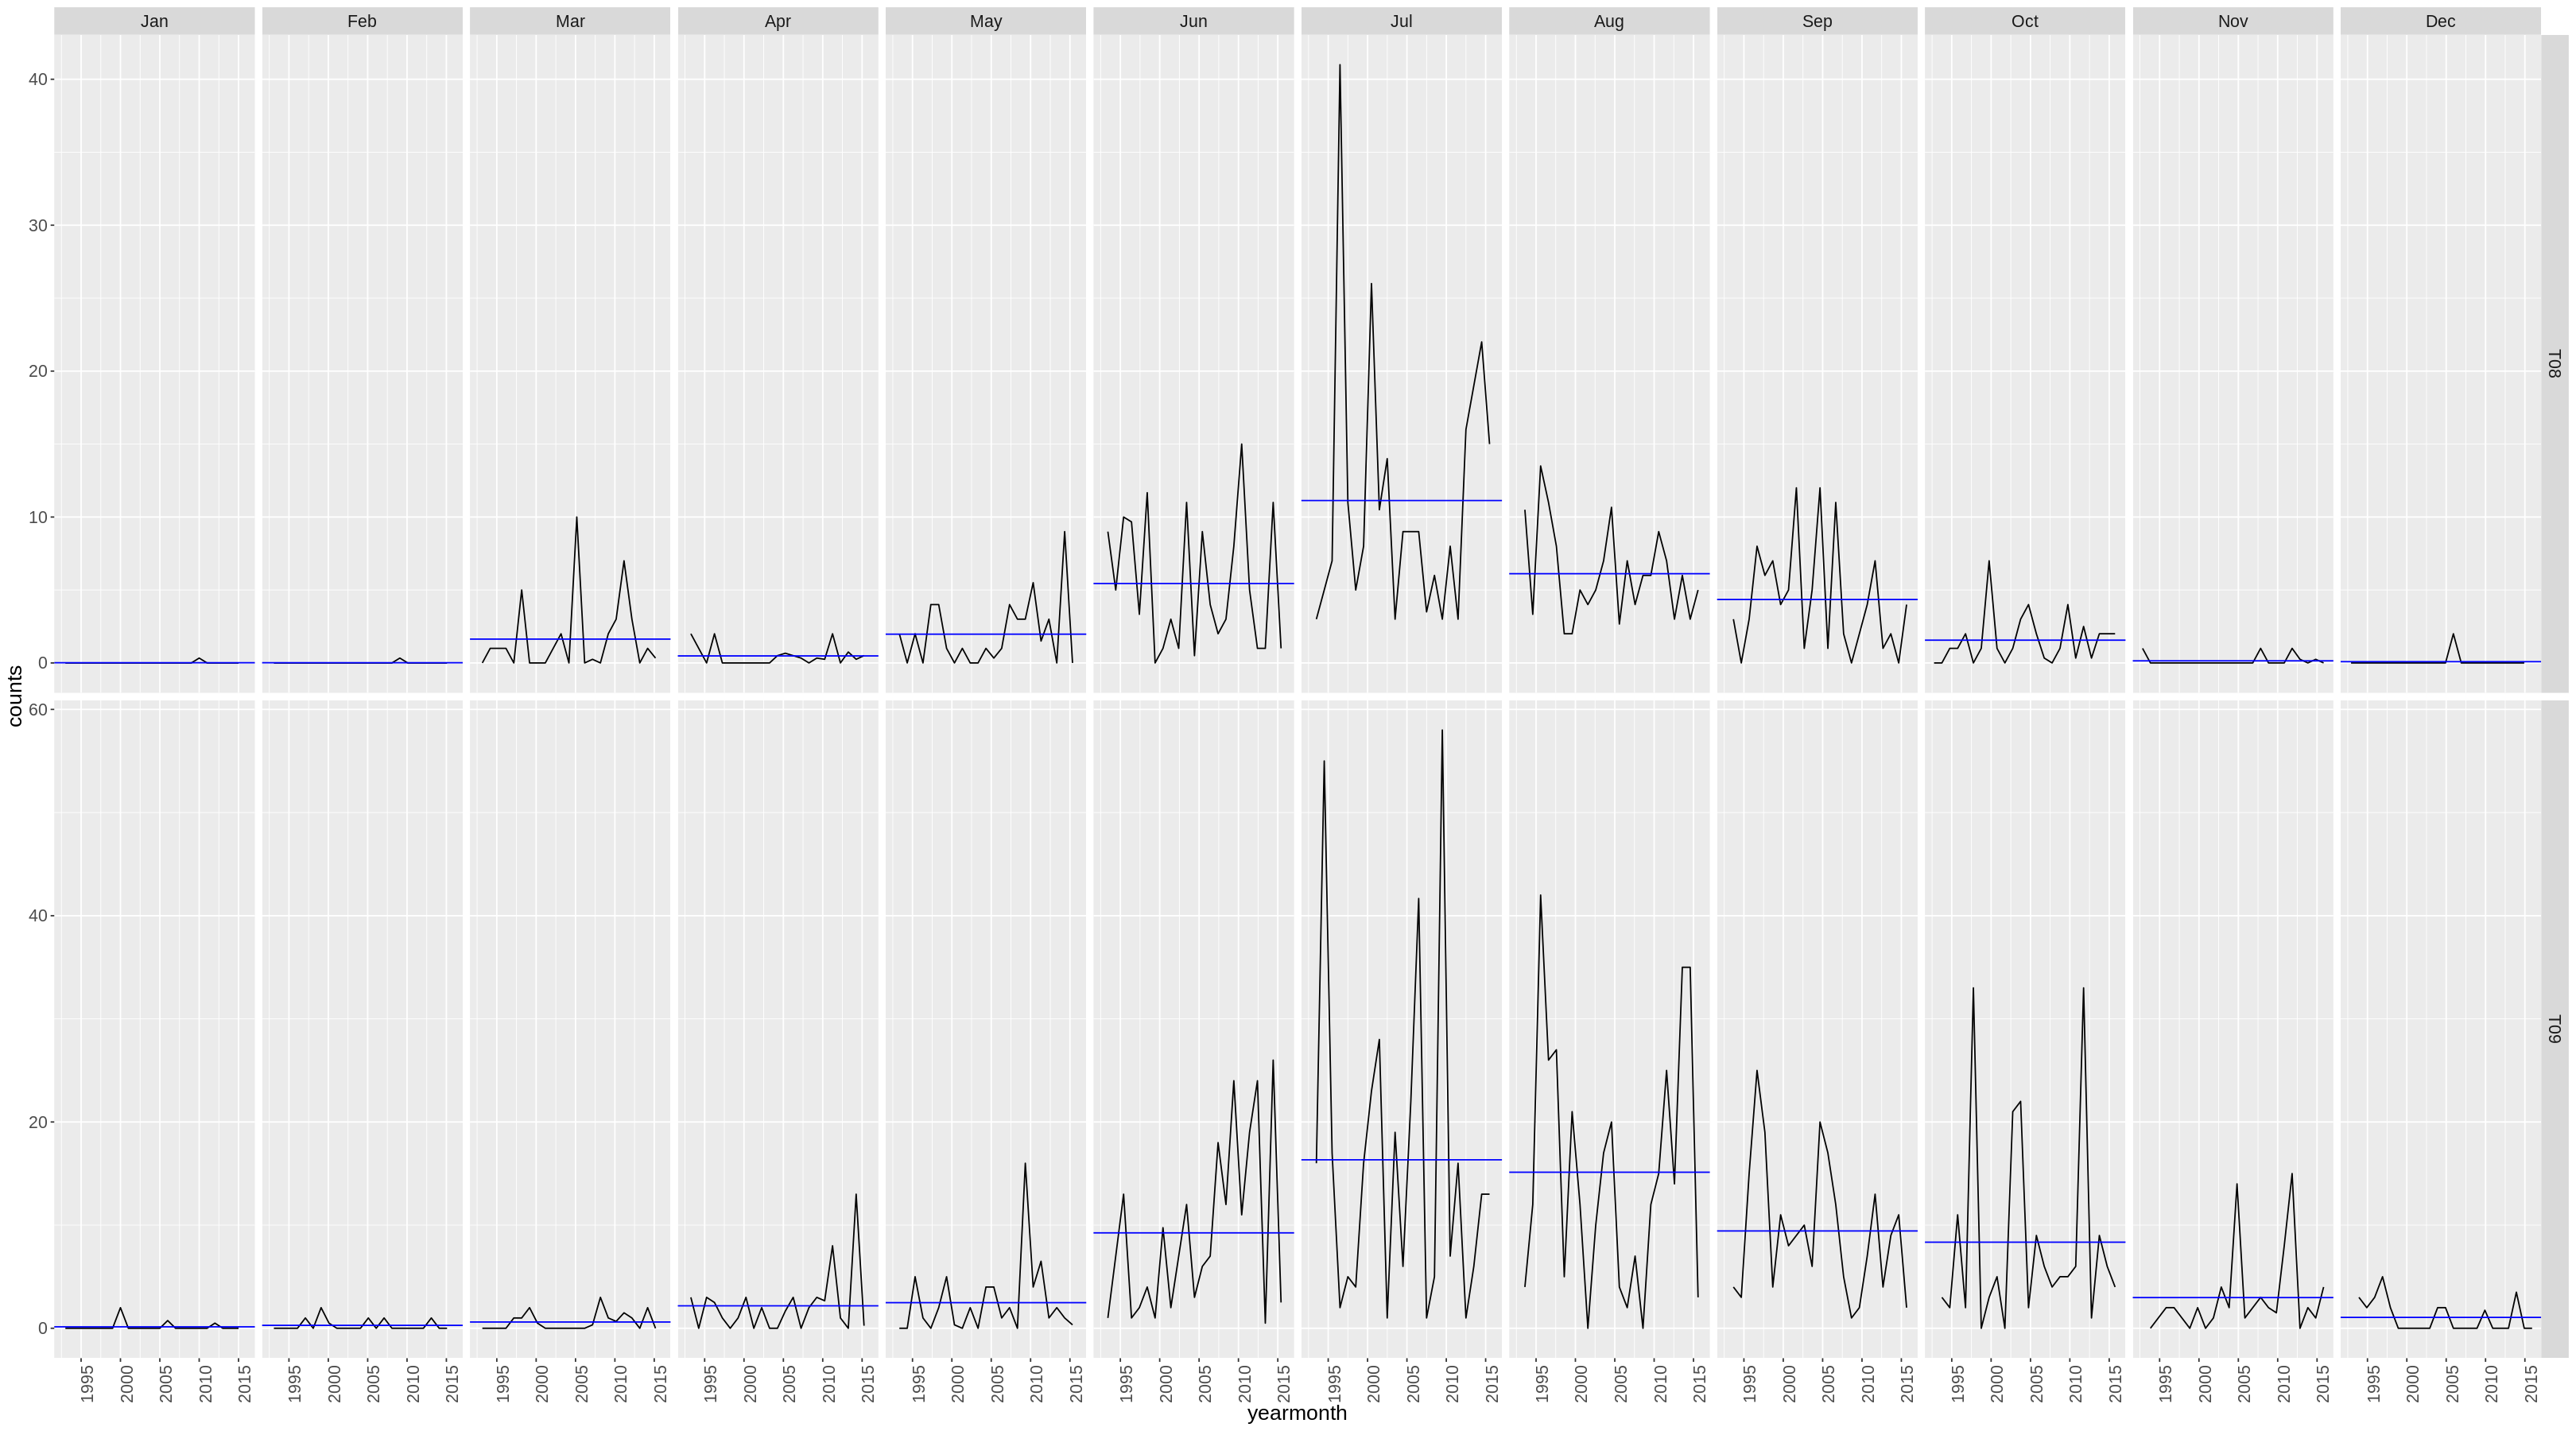

In [4]:
data %>% tsibble::as_tsibble(index=yearmonth, key=site) %>% 
    feasts::gg_subseries(y=counts) + 
    theme(text = element_text(size = 16))

# Subseries plot of decomp_deseason_std

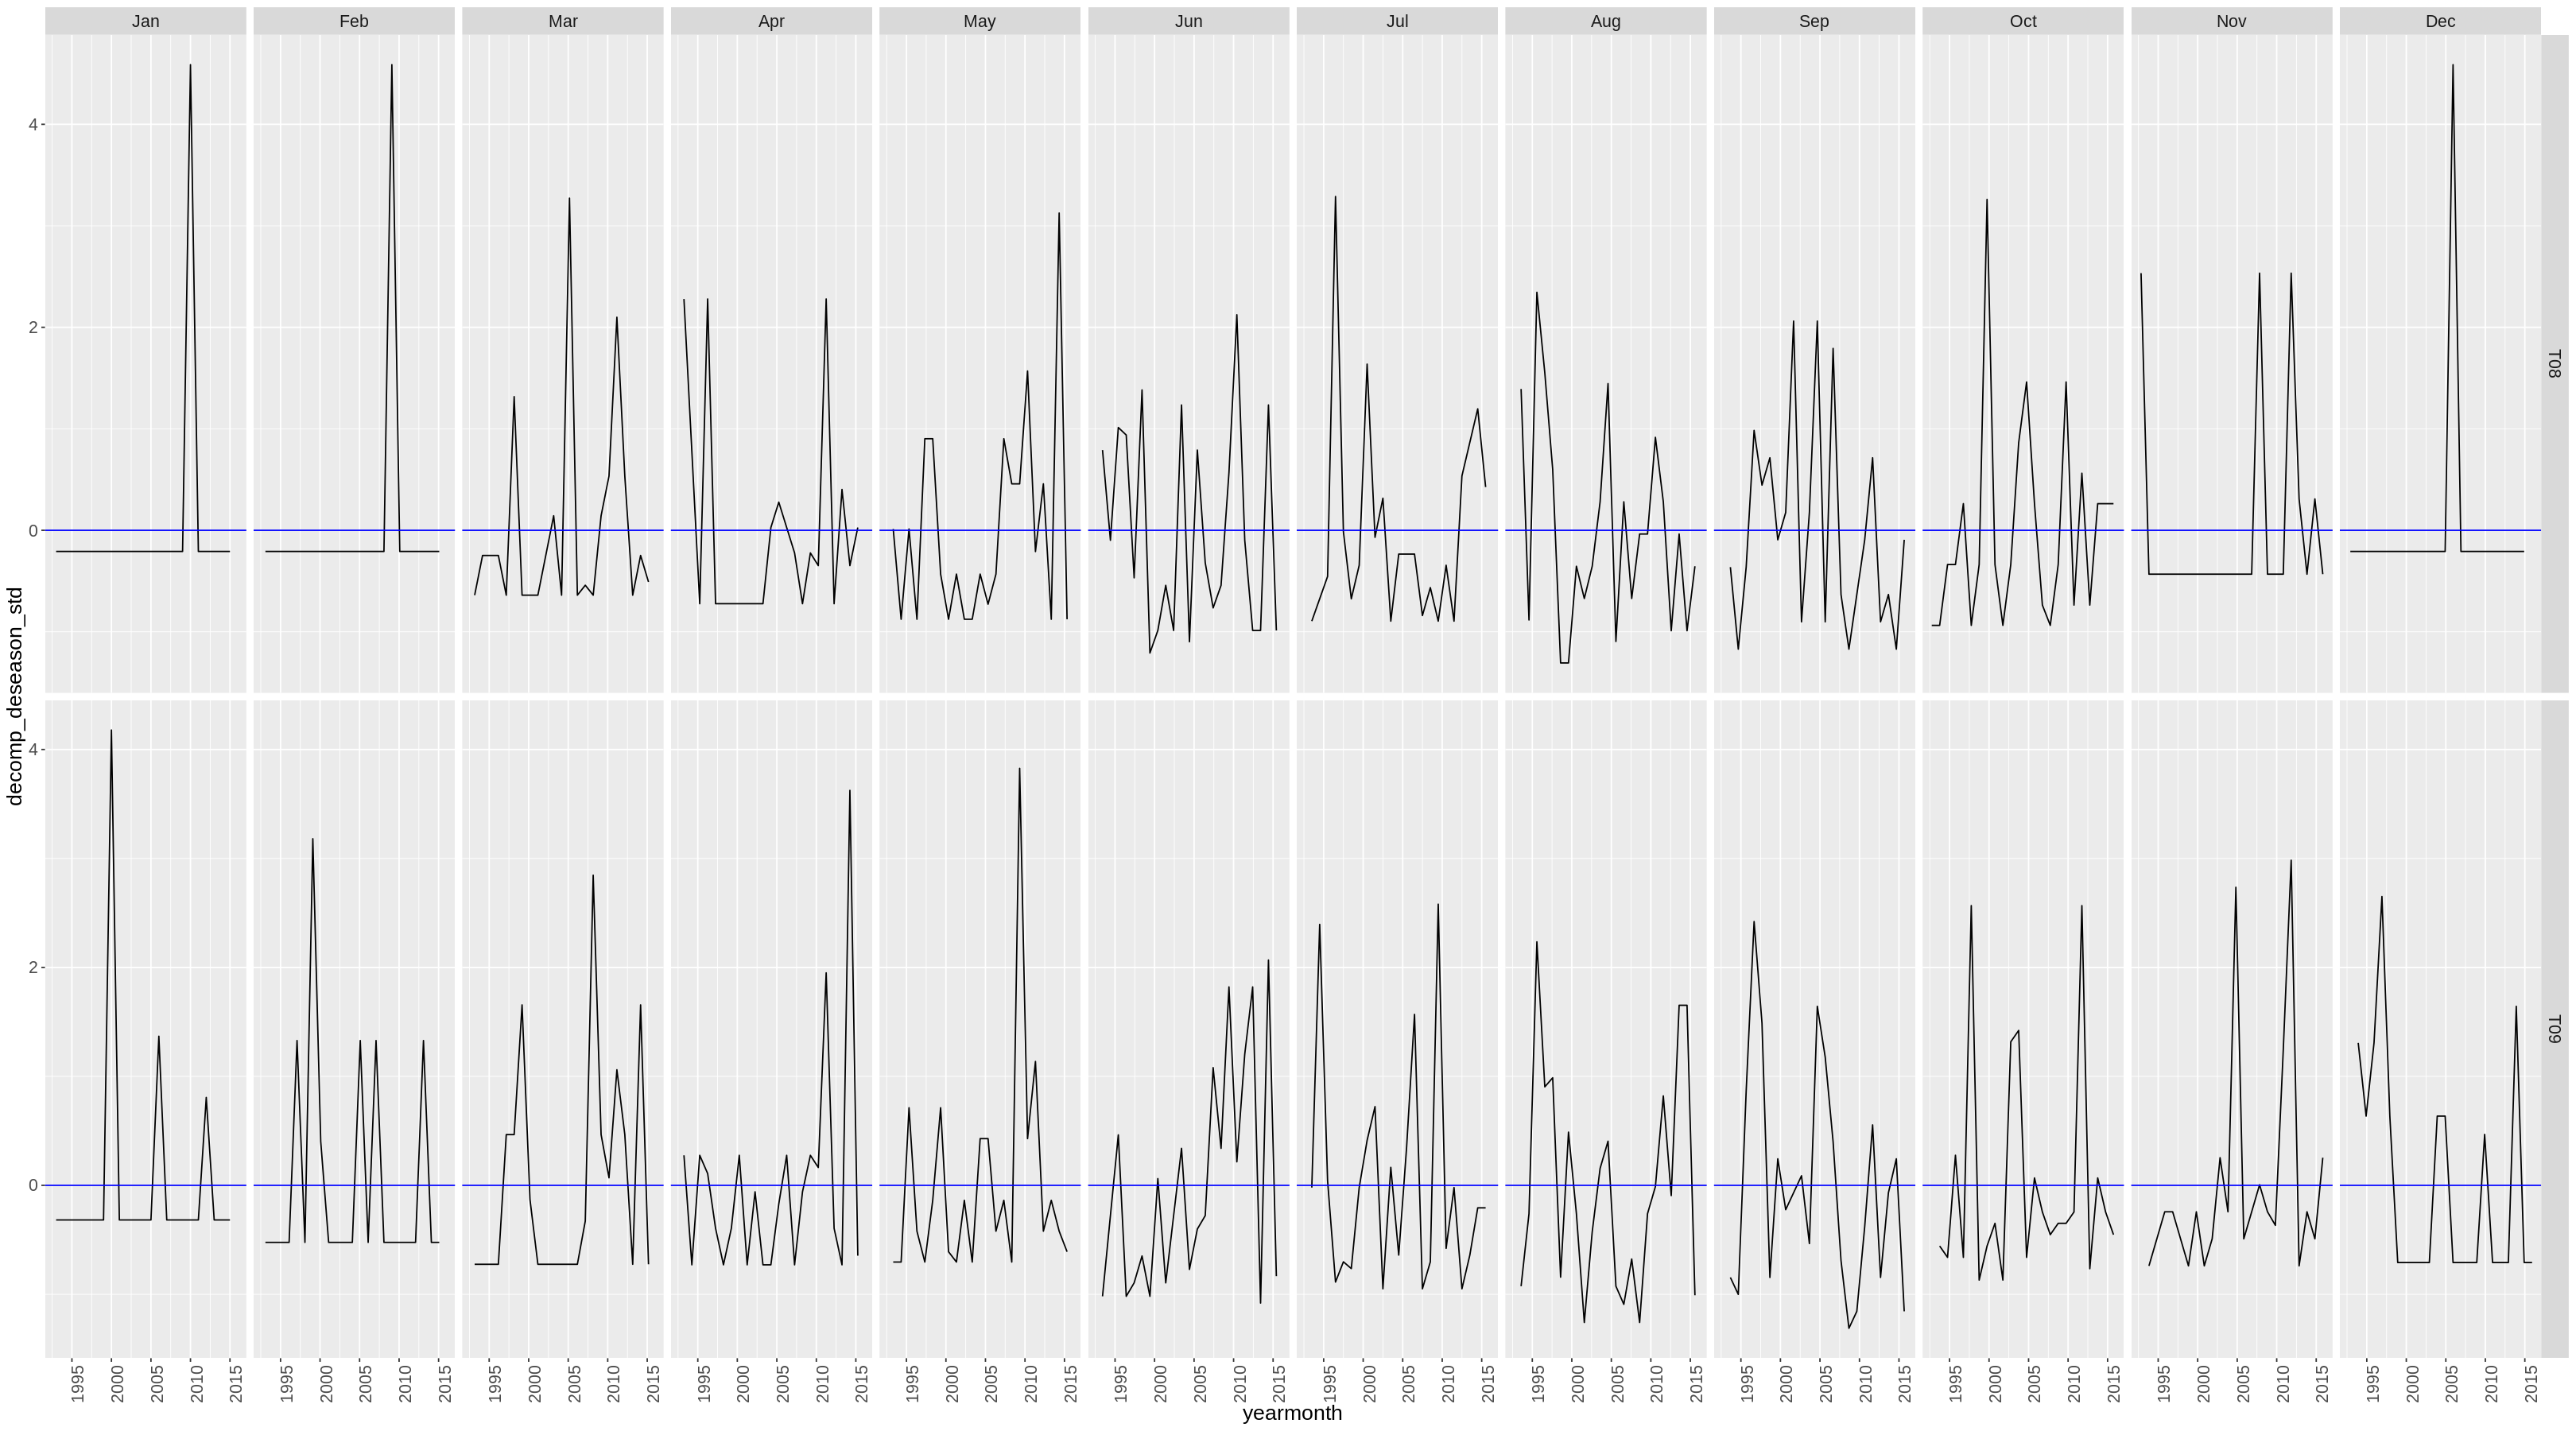

In [5]:
data %>% tsibble::as_tsibble(index=yearmonth, key=site) %>% 
    feasts::gg_subseries(y=decomp_deseason_std) + 
    theme(text = element_text(size = 16))

# Seasons over date range
Plot the counts over daterange but colour by season (month)

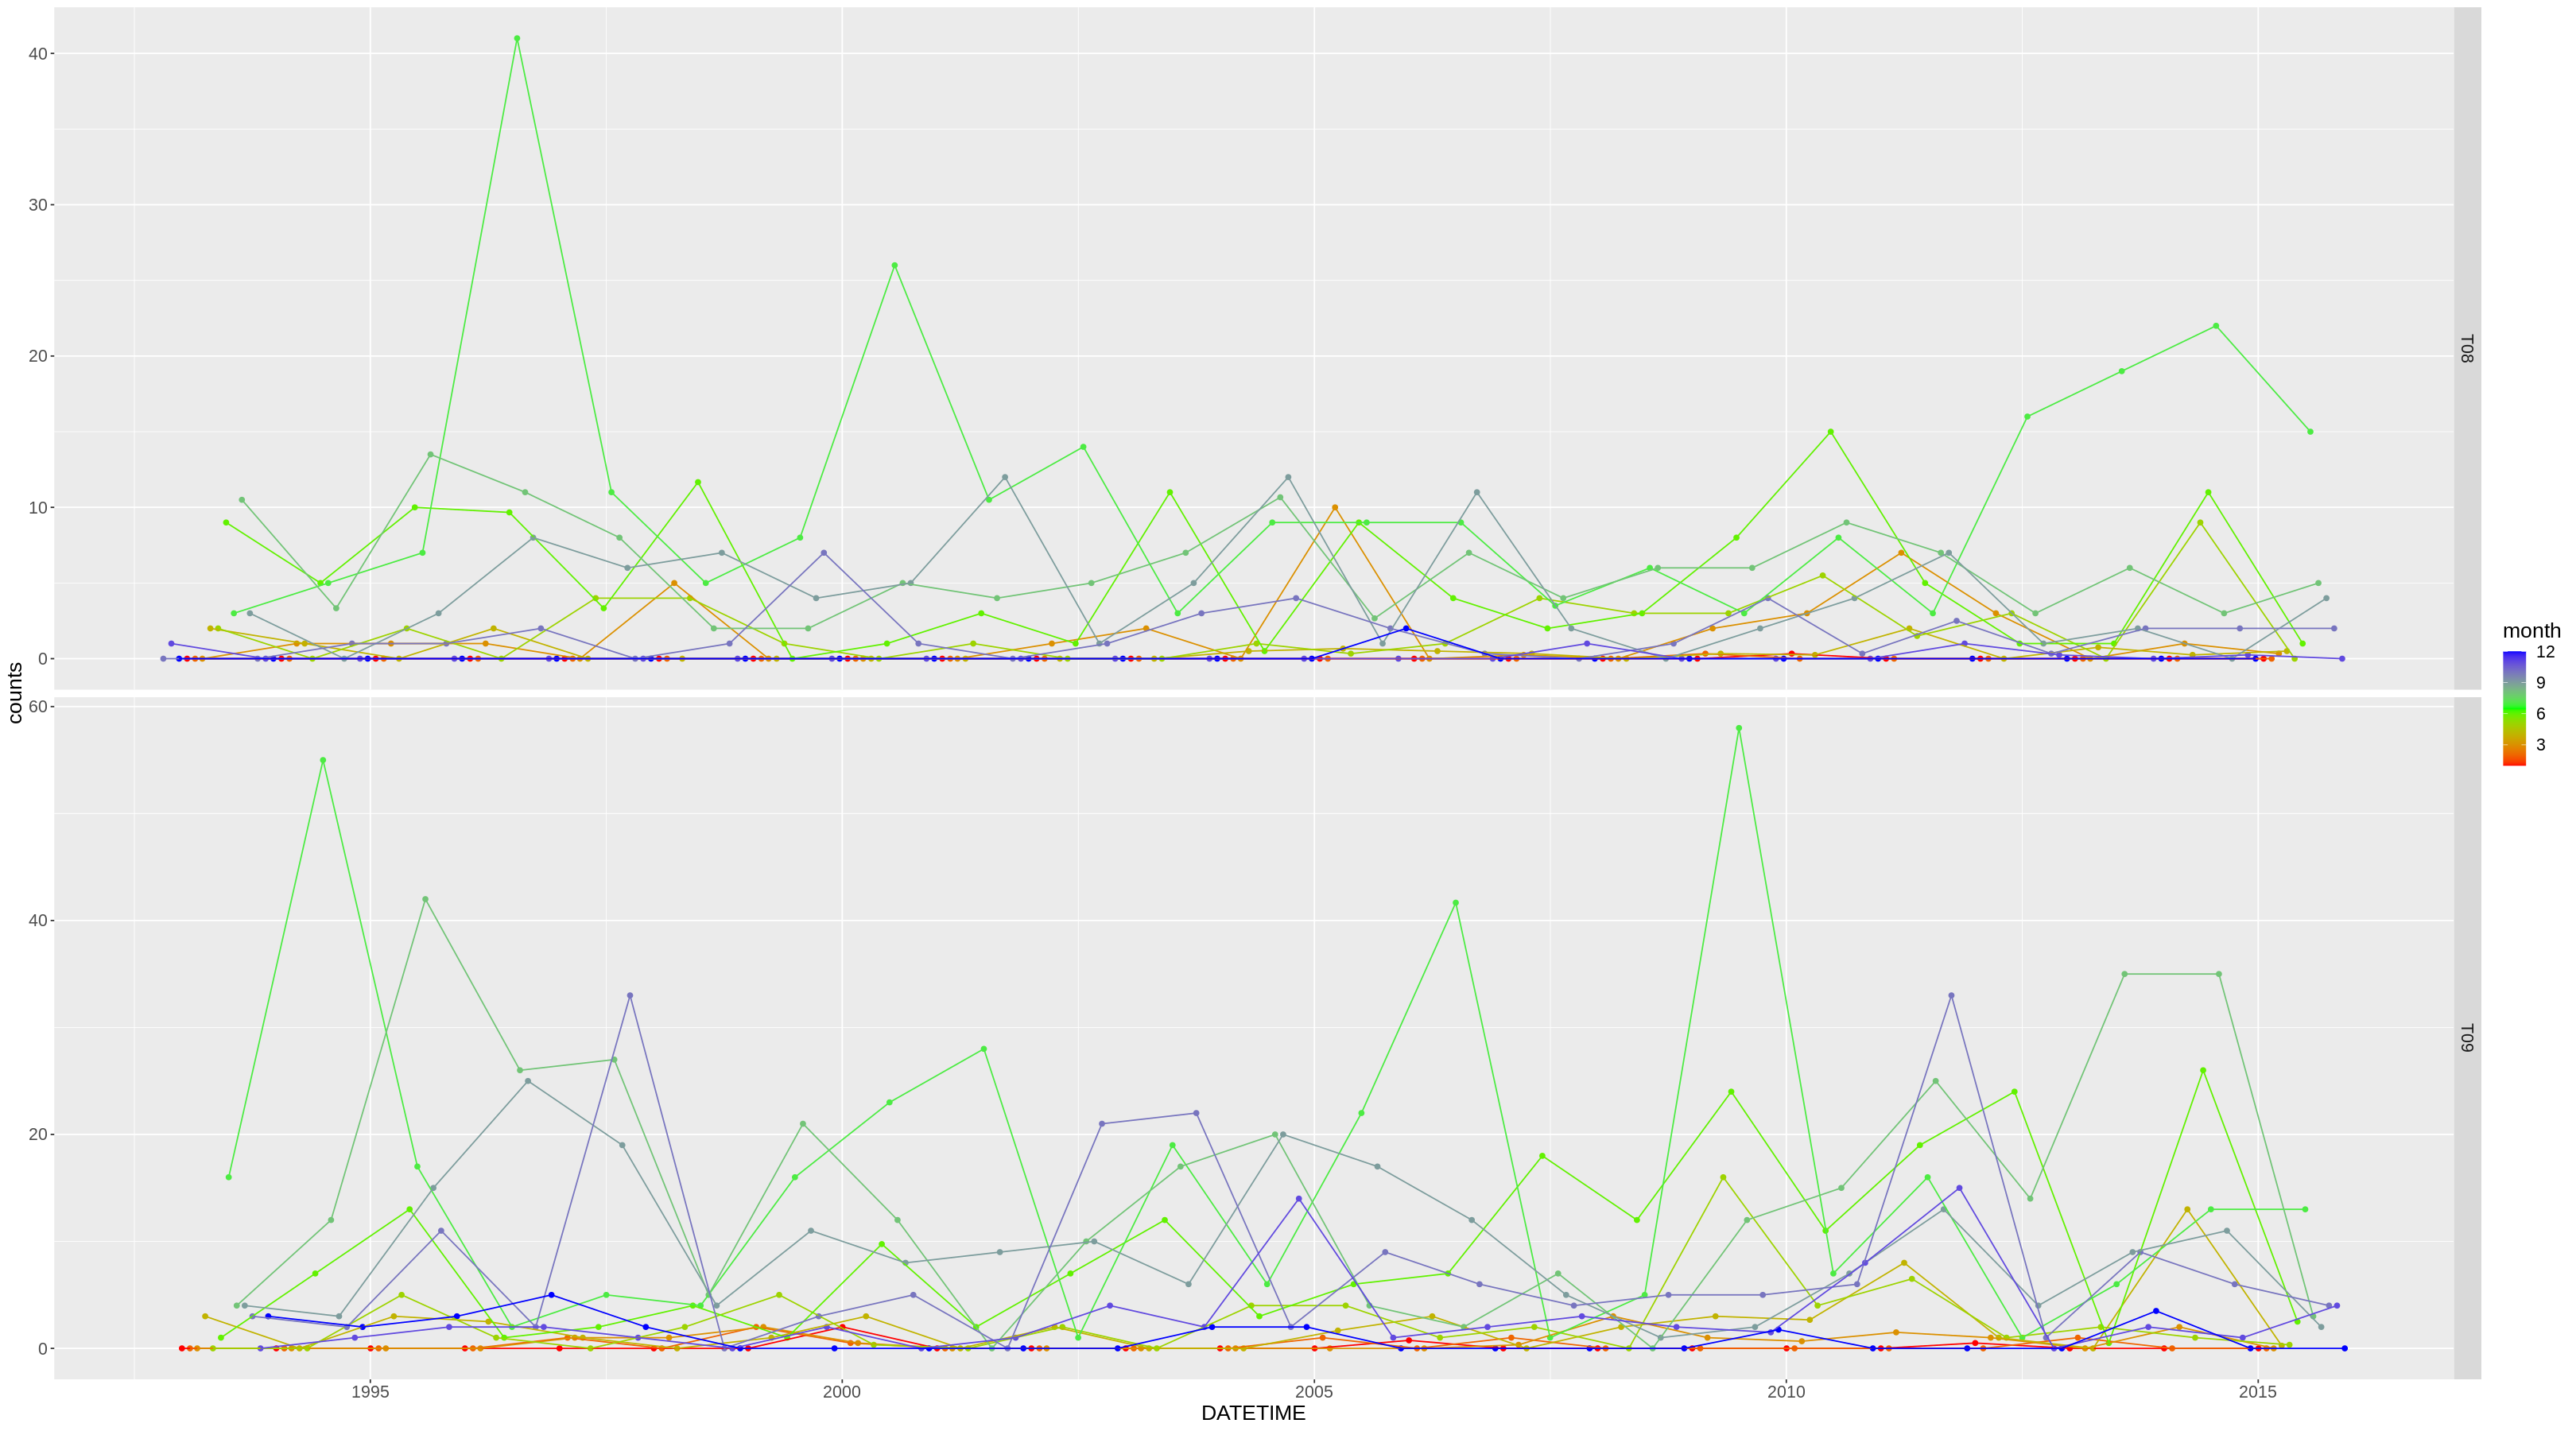

In [6]:
data %>% ggplot2::ggplot(aes(x = DATETIME, y = counts, group=month, color=month) ) +
    geom_point() +
    geom_line() +
    scale_color_gradientn(colours = rainbow(3)) +
    ggplot2::facet_grid(site ~ ., scales="free_y") + 
    theme(text = element_text(size = 16))

# Seasons over data range (deseasonalised values)
Plot the deseasonalised counts over daterange but colour by season (month)

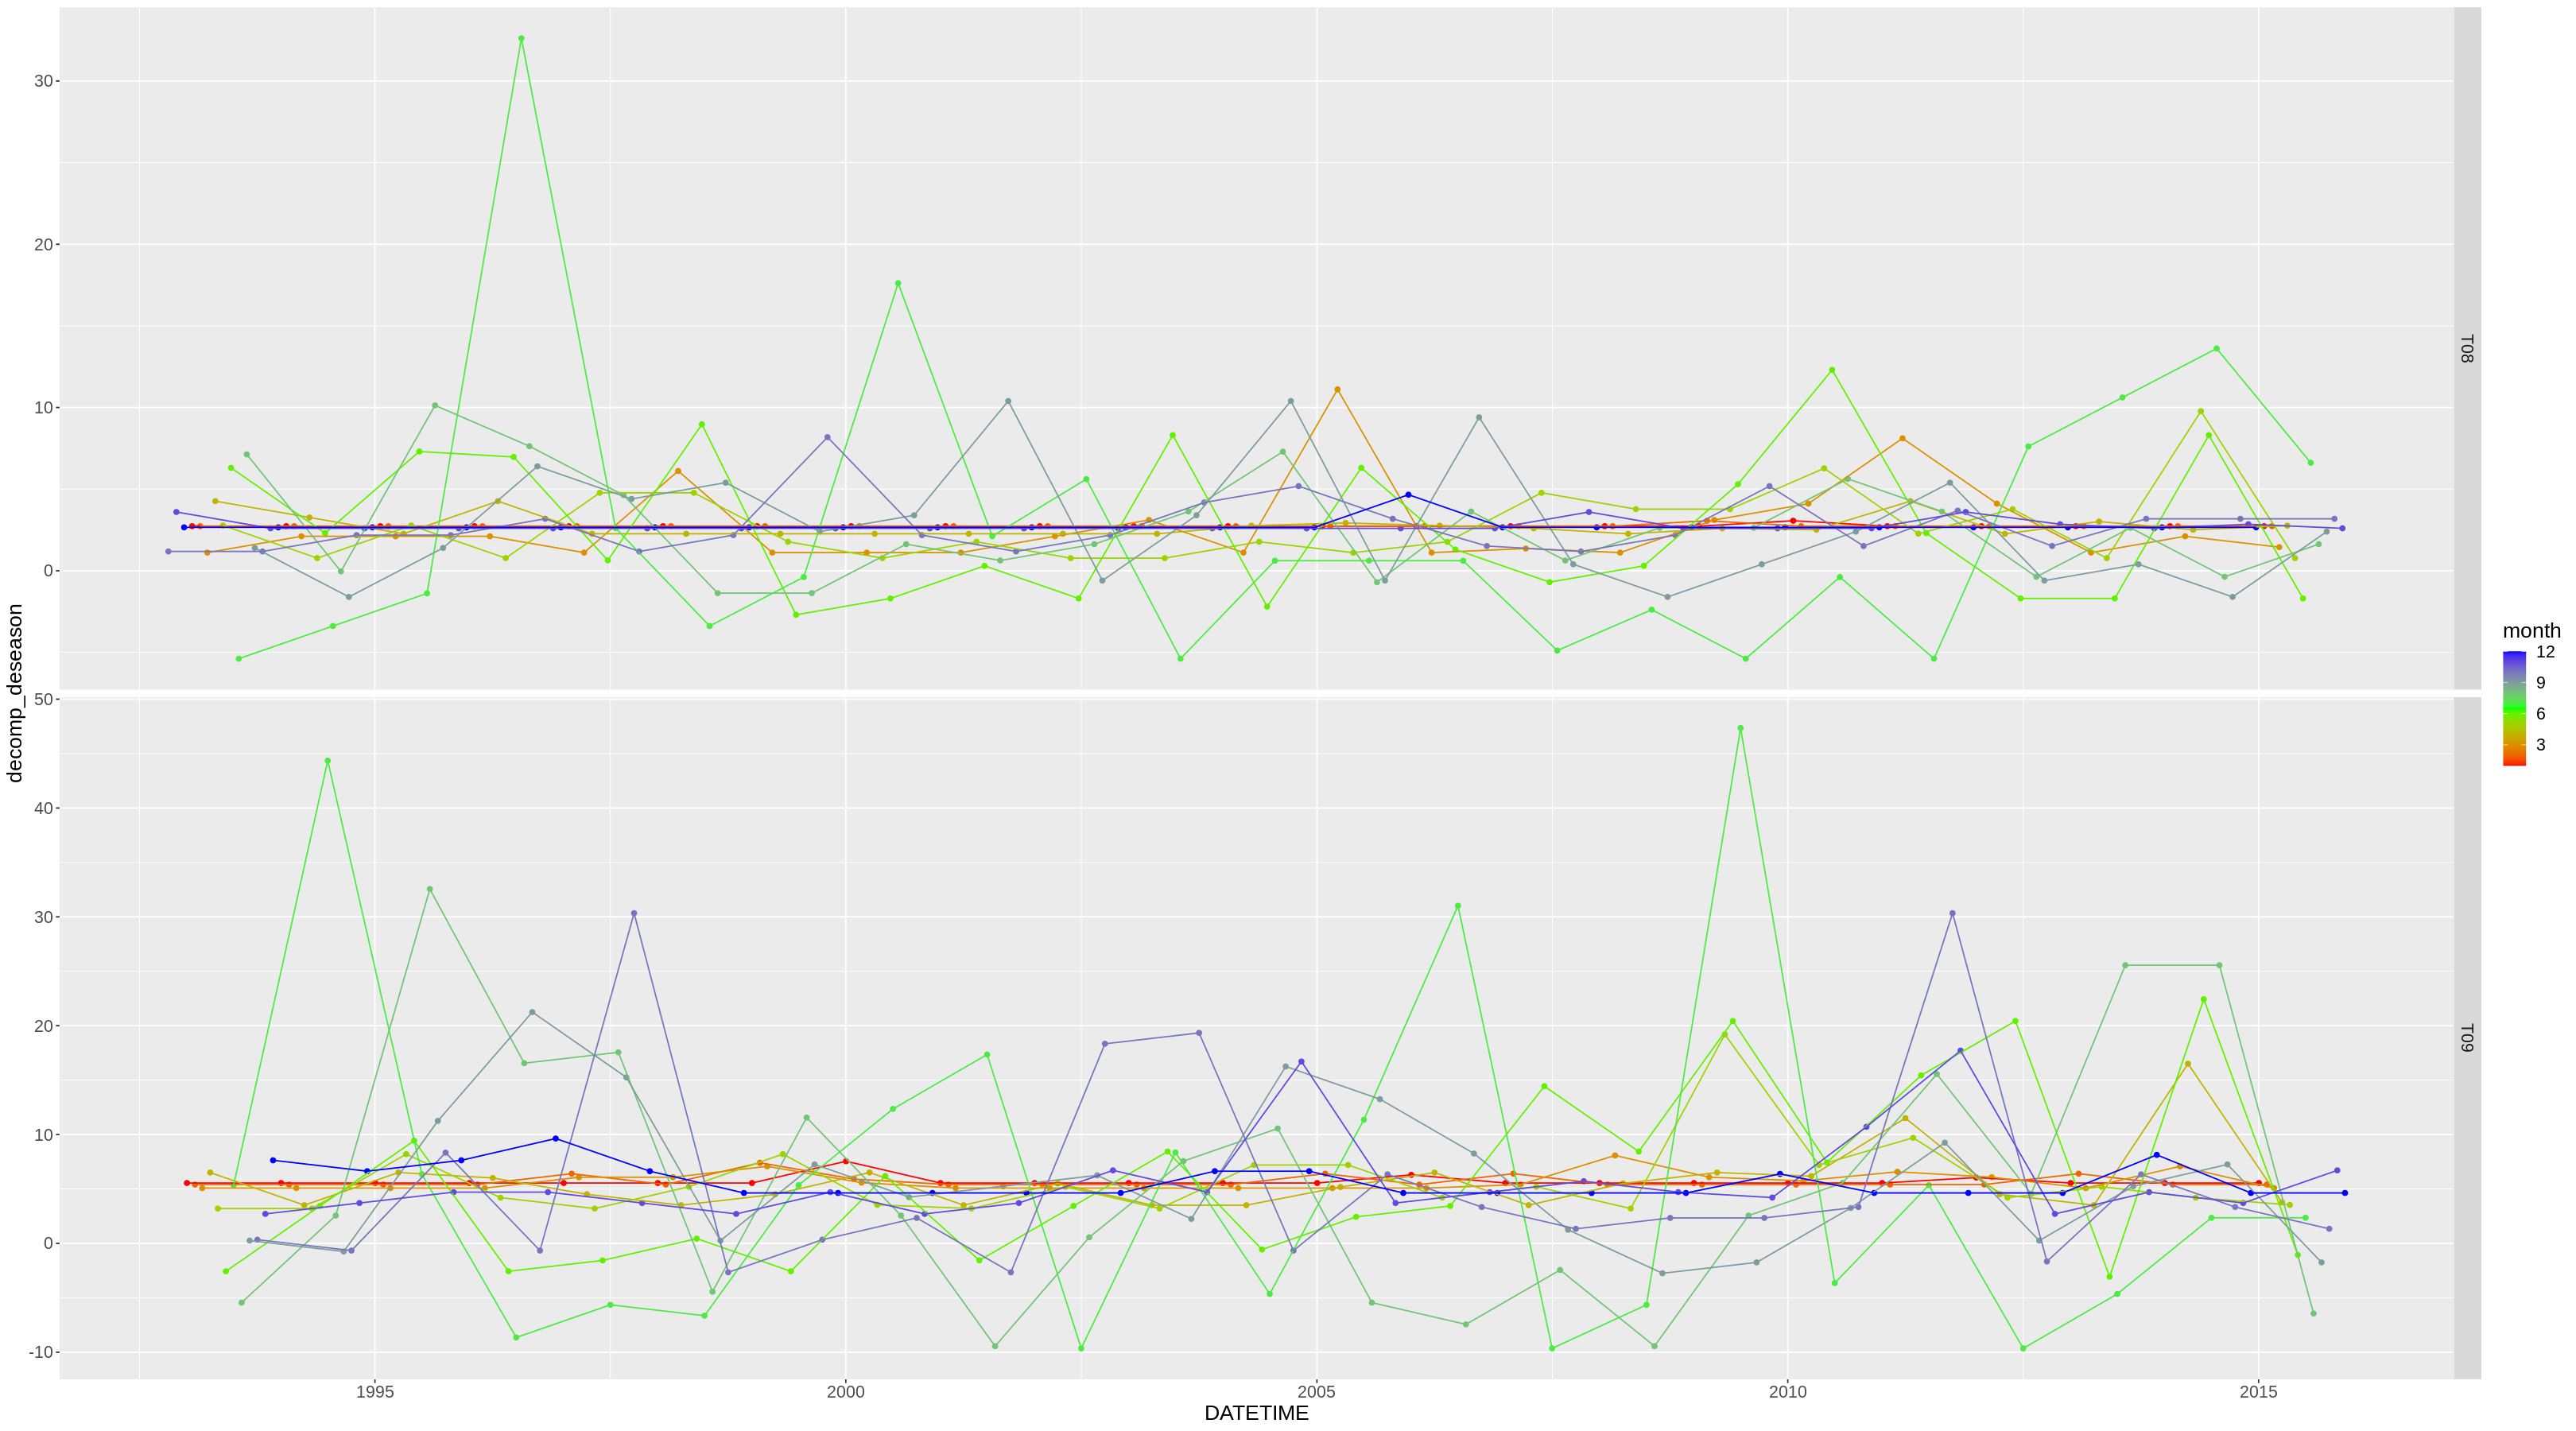

In [7]:
data %>% ggplot2::ggplot(aes(x = DATETIME, y = decomp_deseason, group=month, color=month) ) +
    geom_point() +
    geom_line() +
    scale_color_gradientn(colours = rainbow(3)) +
    ggplot2::facet_grid(site~., scales="free_y") + 
    theme(text = element_text(size = 16))

# Deseasonalised counts
Plot the deseasonalised counts 

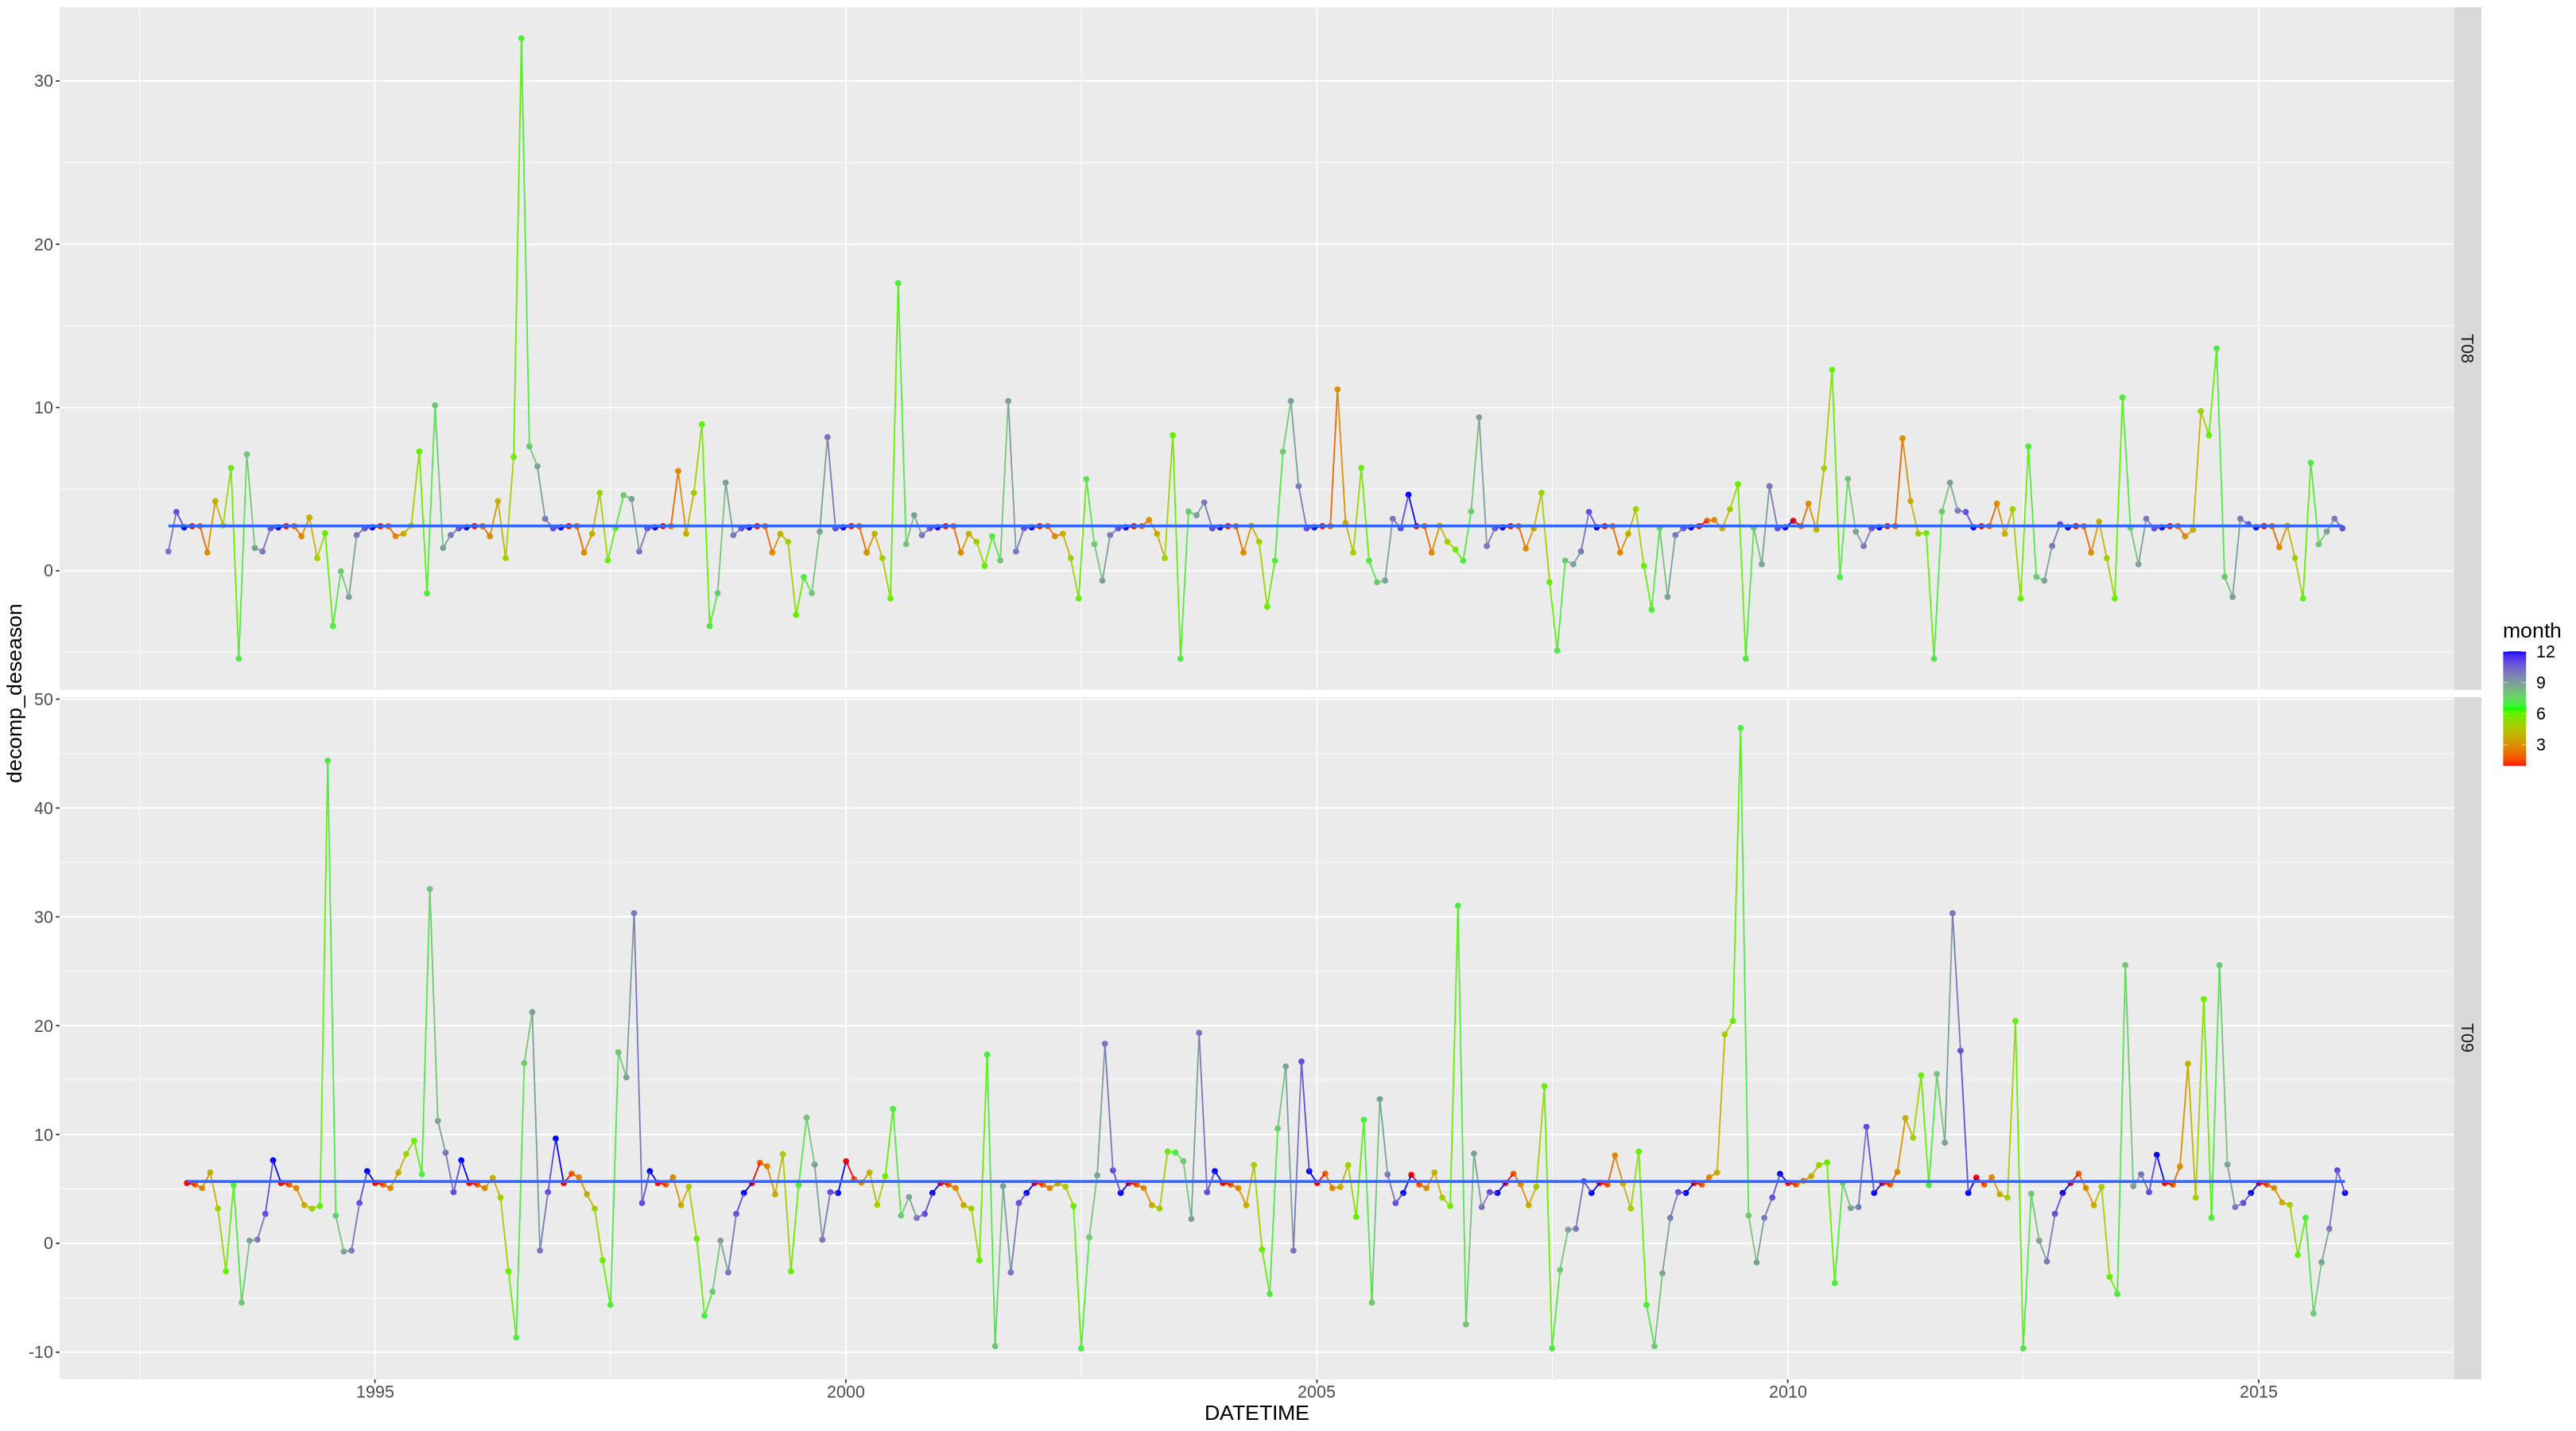

In [8]:
deseasonalised_counts <- data %>% 
    ggplot2::ggplot(aes(x = DATETIME, y = decomp_deseason, color=month)) + 
    geom_point() +
    geom_line() + 
    scale_color_gradientn(colours = rainbow(3)) +
    stat_smooth(method='lm', formula=y~1, se=F) +
    facet_grid(site ~ ., scales='free_y') + 
    theme(text = element_text(size = 16))

print( deseasonalised_counts )

In [9]:
print( data )
print( multifreq_cpts_dd )

# A tibble: 554 x 17
   DATETIME   counts n_species seq_id next_meas duration ENDDATE    yearmonth
   <date>      <dbl>     <dbl>  <dbl>     <dbl>    <dbl> <date>         <mth>
 1 1992-10-22      0         0     NA        NA        0 NA          1992 Oct
 2 1992-11-22      1         1     NA        NA        0 NA          1992 Nov
 3 1992-12-22      0         0     NA        NA        0 NA          1992 Dec
 4 1993-01-22      0         0     NA        NA        0 NA          1993 Jan
 5 1993-02-22      0         0     NA        NA        0 NA          1993 Feb
 6 1993-03-22      0         0     NA        NA        0 NA          1993 Mar
 7 1993-04-22      2         1     NA        NA        0 NA          1993 Apr
 8 1993-05-22      2        NA      5         1        1 1993-05-22  1993 May
 9 1993-06-22      9         8     NA        NA        0 NA          1993 Jun
10 1993-07-22      3         3     NA        NA        0 NA          1993 Jul
# … with 544 more rows, and 9 more variable

ERROR: Error in print(multifreq_cpts_dd): object 'multifreq_cpts_dd' not found


# Add multi frequency changepoints (new method)

In [ ]:
multifreq_cpts_dd <- multi_site_changepoints(
    data, 
    as.list(rep("bic",nsites)), 
    as.list(rep("normal_meanvar",nsites)), 
    "decomp_deseason")

deseasonalised_counts + 
    geom_vline(data = multifreq_cpts_dd, aes(xintercept = loc), color='red', linetype='dashed')

In [ ]:
multifreq_cpts_ddstd

# Compare multi-frequency changepoints to univariate changepoints

In [ ]:
setwd("/data/notebooks/jupyterlab-workshop")
source("R/helper.R")

uni_cpts_dd <- multi_site_uni_changepoints(
    data, 
    as.list(rep("bic",nsites)), 
    as.list(rep("normal_meanvar",nsites)), 
    "decomp_deseason"
)

deseasonalised_counts + 
    geom_vline(data = uni_cpts_dd, aes(xintercept = loc), size=1.5, color='grey') +
    geom_vline(data = multifreq_cpts_dd, aes(xintercept = loc), color='red', linetype='dashed')

# Deseasonalised standardised values

In [ ]:
plot_decomp_deseason_std <- data %>% 
    ggplot2::ggplot(aes(x = DATETIME, y = decomp_deseason_std, color=month)) + 
    geom_point() +
    geom_line() + 
    scale_color_gradientn(colours = rainbow(3)) +
    stat_smooth(method='lm', formula=y~1, se=F) +
    facet_grid(site ~ ., scales='free_y') + 
    theme(text = element_text(size = 16))

print(plot_decomp_deseason_std)

# Deseasonalised standardised with multi frequency changepoints

In [ ]:
multifreq_cpts_ddstd <- multi_site_changepoints(
    data, 
    as.list(rep("bic",nsites)), 
    as.list(rep("normal_meanvar",nsites)), 
    "decomp_deseason_std")

plot_decomp_deseason_std + 
    geom_vline(data = multifreq_cpts_ddstd, aes(xintercept = loc), color='red', linetype='dashed')

# Deseasonalised standardised with multi frequency and univariate changepoints

In [ ]:
uni_cpts_ddstd <- multi_site_uni_changepoints(
    data, 
    as.list(rep("bic",nsites)), 
    as.list(rep("normal_meanvar",nsites)), 
    "decomp_deseason_std"
)

plot_decomp_deseason_std + 
    geom_vline(data = uni_cpts_ddstd, aes(xintercept = loc), size=1.5, color='grey') +
    geom_vline(data = multifreq_cpts_ddstd, aes(xintercept = loc), color='red', linetype='dashed')

What does this tell us?
1. Anything deviating from the blue horizontal line, either below or above "average".
2. Biggest changes are in the summer months (colours close to green) when moth counts are highest
3. Around 1996, below average May followed by very high June, July and August

# Moving average
Plot the [2x12ma](https://otexts.com/fpp2/moving-averages.html) moving average

In [ ]:
plot_ma <- ggplot2::ggplot(data, aes(x = DATETIME, y = ma2x12)) + 
    geom_point() +
    geom_line() + 
    stat_smooth(method='lm', formula=y~1, se=F) + 
    facet_grid(site ~ ., scales='free_y') + 
    theme(text = element_text(size = 16))

# Plot ma2x12 (trend) with multi-frequency changepoints

In [ ]:
setwd("/data/notebooks/jupyterlab-workshop")
source("R/helper.R")

multifreq_cpts_ma2x12 <- multi_site_changepoints(
    data, 
    as.list(rep("bic",nsites)), 
    as.list(rep("normal_meanvar",nsites)), 
    "ma2x12")

plot_ma + 
    geom_vline(data = multifreq_cpts_ma2x12,
               aes(xintercept = loc), 
               color='red', 
               linetype='dashed')

# Plot ma2x12 (trend) with multi-frequency and univariate changepoints

In [ ]:
multifreq_cpts_uni_ma2x12 <- multi_site_uni_changepoints(
    data, 
    as.list(rep("bic",nsites)), 
    as.list(rep("normal_meanvar",nsites)), 
    "ma2x12")

plot_ma + 
    geom_vline(data = multifreq_cpts_ma2x12, aes(xintercept = loc), color='red', linetype='dashed') + 
    geom_vline(data = multifreq_cpts_uni_ma2x12, aes(xintercept = loc), size=1.5, color='grey')

